## Test Code

In [1]:
import tensorflow as tf # 이 줄이 일단 실행이 되어야 한다. 제대로 tensorflow가 안깔리면 여기서 에러 
hello = tf.constant("Hello Tensorflow") #tensorflow의 상수 정의
sess = tf.Session() #텐서플로우의 실행을 위한 세션 생성
print(sess.run(hello)) #print는 python의 기본적인 출력명령, sess세션의 hello 객체 출력하라는 소리임

b'Hello Tensorflow'


## 기본용어


Tensor : 모든 데이터를 텐서라고 부른다. 일종의 다차원 배열

Node : 수학적 계산, 데이터 입/출력, 그리고 데이터의 읽기/저장 등의 작업을 수행하는 녀석이다. 즉, 수학 연산자를 뜻함.

Edge : 엣지는 노드들 간 데이터의 입출력 관계를 의미한다. 다차원 data array를 뜻함.

Operation : 하나이상의 텐서를 입력받고 계산(연산)을 수행하고 결과를 하나 이상으로 텐서로 반환하는 것

Session : Operation의 실행환경을 캡슐화한 것

Variable : 그래프의 실행시, 파라미터를 저장하고 갱신해주는 역할

## 1. 변수 생성

Tensorflow에서는 Variable() 이라는 생성자를 사용해서 변수를 생성할 수 있습니다.

이 변수는 생성되는 순간에 데이터의 타입과 크기가 결정이 됩니다.



아래와 같이 2.0의 실수 값을 생성하고 그 즉시 print를 해보면 object의 형태로만 보여지고 값이 출력이 되지 않습니다.



또, 이 변수들은 상수와는 다르게 특별히 초기화를 해주어야 합니다.

tf.initialize_all_variables() 라는 op을 이용해서 위에 정의된 모든 변수들을 초기화하며 이를 수행하지 않고 실행을 하면 에러가 발생하게 됩니다.



그리고 이렇게 초기화된 변수들은 session에서 한번 실행을 해주어야 실제로 사용이 가능해지고,

sess.run(x)를 통해서 x 값을 출력하면 정상적으로 2.0의 값이 출력이 되는 것을 볼 수 있습니다.


In [23]:
import tensorflow as tf

x = tf.Variable( 2. )
print(x)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
print(sess.run(x))


<tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>
2.0


## 2. 변수 초기화

이렇게 생성된 변수 x는 연산과 같은 op에서 자유롭게 사용이 가능하며 또는, 또 다른 변수 y를 초기화 하는데 사용이 될 수도 있습니다.

아래와 같이 y 변수를 생성할 때 x의 값을 사용해서 초기값을 셋팅하는 것이 가능합니다. x.initialized_value()



In [24]:
import tensorflow as tf

x = tf.Variable( 2. )
y = tf.Variable(x.initialized_value() + 3.)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
print(sess.run(y))


5.0


## 3. Random data 생성

x변수를 784 x 200 Matrix로 생성을 해보겠습니다. tf.random_normal()을 이용해서 한번에 쉽게 랜덤한 데이터를 만들어 낼 수 있습니다.

y를 출력하면 아래 결과와 같이 실수형 데이터들이 보여집니다. 784개의 행과 200개의 열의 데이터가 생성이 되었습니다.

마지막에 y.get_shape()를 통해서 y 변수가 가지고 있는 크기 정보를 확인할 수도 있습니다.


In [25]:
import tensorflow as tf

x = tf.Variable(tf.random_normal([784, 200], stddev=0.35))
y = tf.Variable(x.initialized_value() + 3.)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
print(sess.run(y))
print(y.get_shape())


[[3.0759423 3.5945694 3.0041502 ... 2.9790406 2.760371  2.6753829]
 [3.166038  2.4490554 3.0106313 ... 2.5091825 2.7996283 2.6623933]
 [3.0582933 3.0499613 3.2758083 ... 3.3573356 2.7926114 3.7206354]
 ...
 [2.8352232 3.217903  3.1571803 ... 3.07884   2.5014005 2.6138892]
 [3.192233  3.3952265 2.51095   ... 2.9549987 2.7752652 3.6141584]
 [2.7919993 3.396108  3.197571  ... 2.9145725 3.2038188 2.9378705]]
(784, 200)


## 4. 데이터 파일로 저장

이렇게 생성되고 사용되어진 변수들은 파일로 저장하거나 불러와서 재사용할 수도 있습니다.

Tensorflow에서는 이러한 기능을 saver 라는 op을 통해서 제공하고 있습니다.

아래와 같이 tf.train.Saver() op을 통해서 /tmp/model.ckpt 파일로 저장을 하면 됩니다.

실제 서버로 ftp나 ssh으로 접속해서 tmp 폴더 아래에 해당 파일이 생성이 되었는지 확인을 해보면 정상적으로 파일을 볼 수 있습니다.


In [ ]:
import tensorflow as tf

x = tf.Variable(tf.random_normal([784, 200], stddev=0.35))
y = tf.Variable(x.initialized_value() + 3.)

init_op = tf.initialize_all_variables()

saver = tf.train.Saver()

sess = tf.Session()
sess.run(init_op)
save_path = saver.save(sess, "/tmp/model.ckpt")


## 5. 파일로부터 데이터 로트

그럼 이번에는 저장된 파일로 부터 데이터를 다시 불러오는 것을 해보겠습니다.

동일하게 tf.train.Saver()를 이용해서 restore를 하면 위에서 저장했던 파일로 부터 데이터를 불러와 다시 사용할 수 있습니다.

출력을 해보면 랜덤이 아닌 저장할 때의 동일한 데이터 값이 계속 출력되는 것을 확인할 수 있습니다.


In [ ]:
import tensorflow as tf

x = tf.Variable(tf.random_normal([784, 200], stddev=0.35))
y = tf.Variable(x.initialized_value() + 3.)

init_op = tf.initialize_all_variables()

saver = tf.train.Saver()

sess = tf.Session()
sess.run(init_op)
saver.restore(sess, "/tmp/model.ckpt")
print(sess.run(x))


## Tesorflow 기본 예제 : 경사 하강법(Gradient Descent)으로 인자 찾아내기

In [36]:
import tensorflow as tf
import numpy as np

# 데이터를 랜덤하게 세팅하는 주는 부분
# Numpy 랜덤으로 100개의 가짜 데이터 채우기. (float64 -> float32로 변환)

x_data = np.float32(np.random.rand(2, 200)) # 0부터 1사이의 균일 분포에서 난수 생성

# 목표값 설정하는 단계
# 학습 레이블(목표값)은 아래의 식으로 산출. (W = [0.1, 0.2], b = 0.3)

y_data = np.dot([0.100000, 0.500000], x_data) + 0.300   #dot은 내적 연산 함수. 매트릭스 곱셈 연산.


#### 입력 데이터와 W, b를 사용해 선형 모델을 정의합니다.

In [37]:
# 실제 학습되어서 목표값에 찾아가는 변수
b = tf.Variable(tf.zeros([1]))

# tf.zeros([1])
# tf.zeros([3, 4], tf.int32) ==> [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  이런 식
# b = tf.Variable(tf.zeros([1]))는 1*1 타입의 데이터에 0을 집어넣고 그래프에 올리는 용도로 쓰는 변수로 세팅하겠다.


# W는 1x2 형태의 웨이트 변수 (균등 랜덤값으로 초기화) 첫번째 초기값 세팅임
# tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
# 생성된 값들은 [minval, maxval]구간의 균등분포를 따릅니다.
# 하한 minval은 구간에 포함(included)되는 반면, 상한인 maxval은 포함되지 않습니다(excluded).

W = tf.Variable(tf.random_uniform([1, 2], -100.0, 100.0))

# 학습시킬 데이터 모델
# tf.matmul => 행렬의 곱셈 [아래 참고]

y = tf.matmul(W, x_data) + b   


tf.matmul(a,b)

a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3]) => [[1. 2. 3.]
                                                      [4. 5. 6.]]

b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2]) => [[7. 8.] 
                                                         [9. 10.]
                                                         [11. 12.]]

c = tf.matmul(a, b) => [[58 64]
                        [139 154]]

#### 이제 손실과 학습 함수를 정의 합니다. 평균 제곱 오차가 최소화 되는 지점을 경사하강법으로 구하게 됩니다.

In [38]:
# 손실에 대한 학습 함수 정의
# 이 코드는 우리가 이미 알고 있는 값 y_data 와 입력 데이터 x_data로 계산된
# y 값 사이의 거리를 제곱한 것의 평균을 계산합니다.

loss = tf.reduce_mean(tf.square(y - y_data))


# 경사하강법으로 학습하면서 발생하는 변화량 최소화 (0.5는 학습 비율)
# 값이 1에 가까이 갈수록 1회 학습당 값의 변동폭 커짐
# 값이 0에 가까이 갈수록 1회 학습당 값의 변동폭 작아짐

optimizer = tf.train.GradientDescentOptimizer(0.5)


# 학습 오퍼레이션 정의

train = optimizer.minimize(loss)


#### 학습 세션을 시작합니다.

In [39]:
# 모든 변수를 초기화.

init = tf.initialize_all_variables()


# 세션 시작

sess = tf.Session()

sess.run(init)



# 200번 학습.

for step in range(0, 200):

    sess.run(train)

    if step % 10 == 0:

        print( step, sess.run(W), sess.run(b) )

0 [[-36.62453   -2.541563]] [56.530876]
10 [[-24.669313  -9.516855]] [19.719265]
20 [[-12.719031   -5.9844456]] [10.978622]
30 [[-6.6082478 -3.4734085]] [6.193572]
40 [[-3.4482956 -1.8592921]] [3.553073]
50 [[-1.7936746  -0.87227917]] [2.0957327]
60 [[-0.9180166 -0.2869922]] [1.2913214]
70 [[-0.450491    0.05313703]] [0.8472759]
80 [[-0.19906807  0.24807802]] [0.6021431]
90 [[-0.06307393  0.35871878]] [0.46681306]
100 [[0.01082445 0.42107323]] [0.3920992]
110 [[0.05112617 0.45603418]] [0.35084966]
120 [[0.07316776 0.4755617 ]] [0.32807538]
130 [[0.08524919 0.48643804]] [0.3155012]
140 [[0.09188256 0.49248302]] [0.30855873]
150 [[0.09552942 0.4958374 ]] [0.3047256]
160 [[0.0975364  0.49769655]] [0.30260918]
170 [[0.09864176 0.498726  ]] [0.30144063]
180 [[0.09925091 0.49929565]] [0.3007954]
190 [[0.09958675 0.49961072]] [0.3004392]


막상 코드를 보니까 단순하게 생각하면 목표값과 입력값의 차이의 제곱을 계속 최소화시키게 반복하면서 목표값에 근접해 가는 것이 핵심인 것을 알 수 있다.

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

## 해석

numpy 패키지를 임포트합니다.

In [1]:
import numpy as np

1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.  

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다. 2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

In [3]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

matplotlib.pyplot을 임포트하고 노트북 페이지에 그래프가 나타나도록 쥬피터 노트북의 matplotlib 매직 커맨드를 사용합니다.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

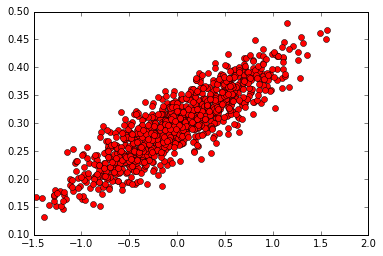

In [5]:
plt.plot(x_data, y_data, 'ro')
plt.show()

텐서플로우 패키지를 로드합니다.

In [6]:
import tensorflow as tf

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [7]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.

In [8]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

모든 변수를 초기화하고 세션을 시작합니다.

In [9]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [ 0.46417809] [ 0.29763955] 0.0415418


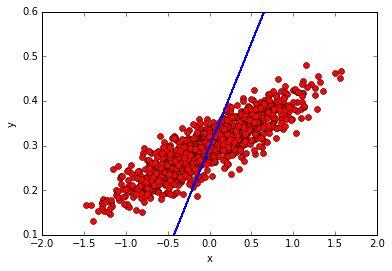

1 [ 0.35305291] [ 0.29782963] 0.0205904


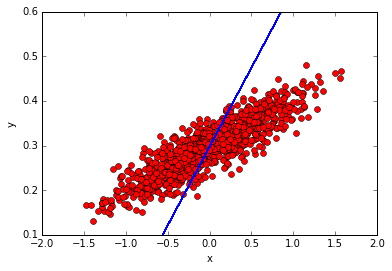

2 [ 0.27563971] [ 0.29796243] 0.0104228


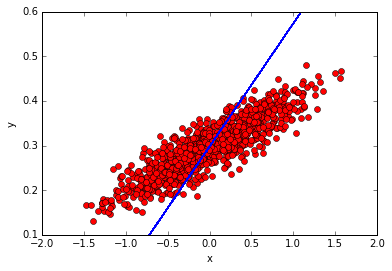

3 [ 0.22171125] [ 0.29805493] 0.00548848


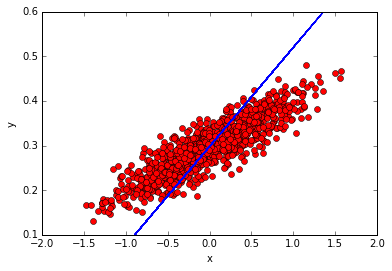

4 [ 0.18414301] [ 0.29811937] 0.0030939


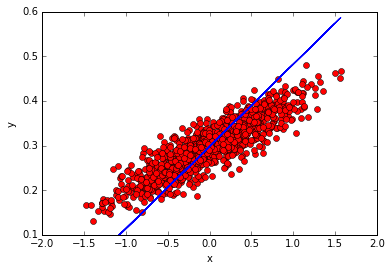

5 [ 0.1579718] [ 0.29816428] 0.00193182


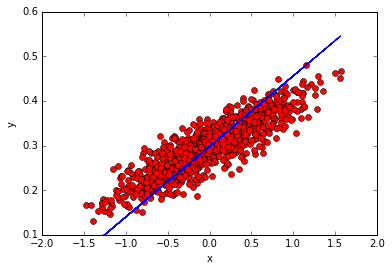

6 [ 0.13974014] [ 0.29819554] 0.00136787


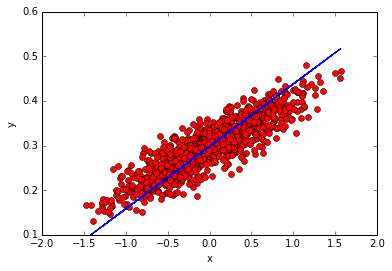

7 [ 0.12703939] [ 0.29821733] 0.00109418


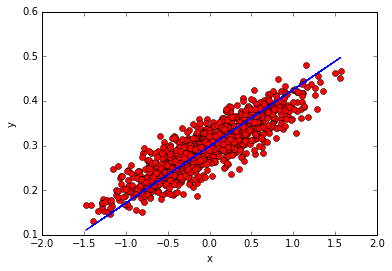

In [10]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()